In [35]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(0, '../scripts/')

In [5]:
import data_loader 

data_obj = data_loader.FetchData()

/Users/nebilarega/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
data_dictionary = data_obj.dfdict

### Effect of promotion

<AxesSubplot:title={'center':'Promo vs.Customers'}, xlabel='Promo', ylabel='Customers'>

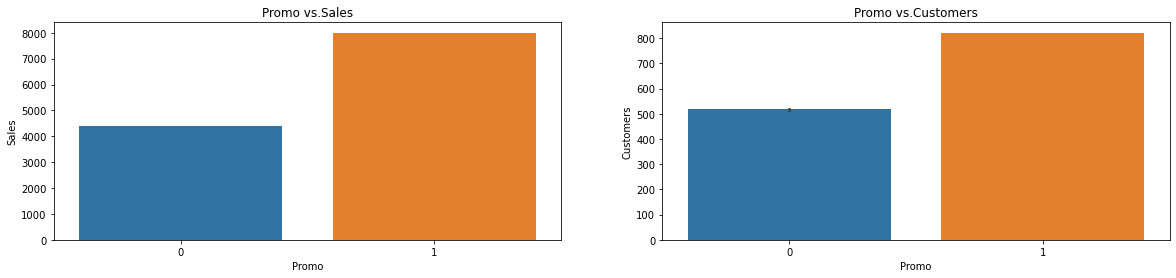

In [14]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 4))

axis1.title.set_text('Promo vs.Sales')
axis2.title.set_text('Promo vs.Customers')
sns.barplot(x='Promo', y='Sales', data=data_dictionary["train"], ax=axis1)
sns.barplot(x='Promo', y='Customers', data=data_dictionary["train"], ax=axis2)


Both Sales and Customers are better with promotion

### Data feature for analysis

In [22]:
df_train = data_dictionary["train"]
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day
df_train['WeekOfYear'] = df_train['Date'].dt.isocalendar().week


Text(0.5, 0, 'Week Of Year')

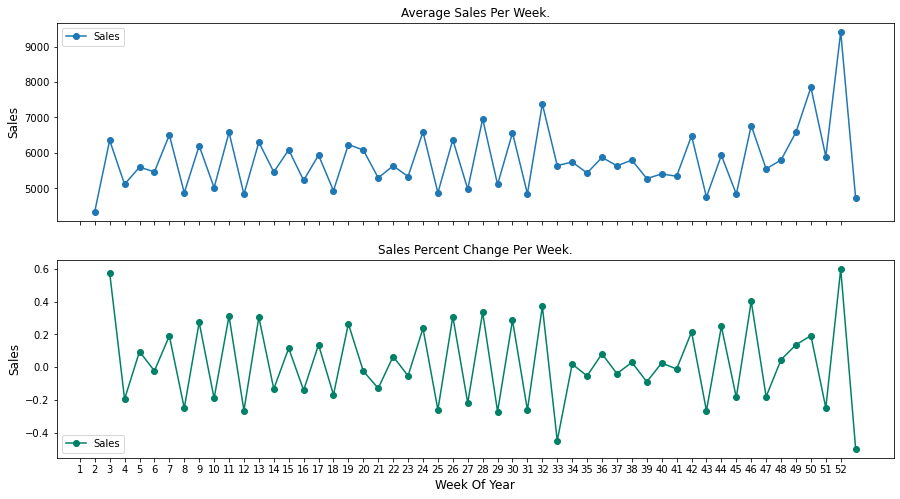

In [24]:
# group by date and get average sales, and precent change
average_sales = df_train.groupby('WeekOfYear')["Sales"].mean()
pct_change_sales = df_train.groupby('WeekOfYear')["Sales"].sum().pct_change()

fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True, ax=axis1,
                         marker='o', title="Average Sales Per Week.")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist())
ax1.set_ylabel('Sales', size=12)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True, ax=axis2, marker='o',
                            colormap="summer", title="Sales Percent Change Per Week.")
plt.ylabel("Sales", size=12)
plt.xlabel('Week Of Year', size=12)


<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

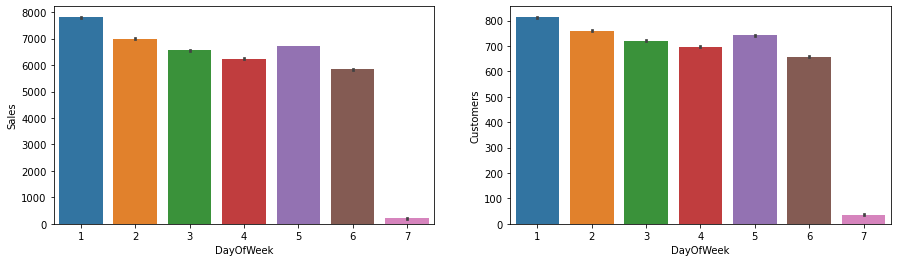

In [25]:
# DayOfWeek
# In both cases where the store is closed and opened.

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=df_train, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=df_train, order=[1,2,3,4,5,6,7], ax=axis2)

Here we observe that Sales and Customers are both very less on Sundays as most of the stores are closed on Sunday.

Also, Sales on Monday is highest in whole week. This might be due to the fact that stores are closed on Sundays.

It is also interesting to note that Christmas and New Year lead to increase in sales. As Rossmann Stores sells health and beauty products, it may be guessed that during Christmas and New Year people buy beauty products as they go out to celebrate and, this might the cause of sudden increase in sales.

### Days stores were open

<AxesSubplot:xlabel='Open', ylabel='count'>

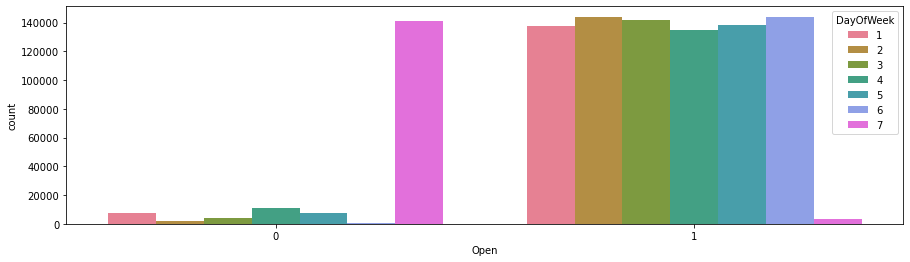

In [26]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=df_train,palette="husl", ax=axis1)

This shows that most of the stores remain closed during Sundays. Some stores were closed in weekdays too, this might be due to State Holidays as stores are generally closed during State Holidays and opened during School Holidays.

### During State and School holidays

<AxesSubplot:xlabel='StateHoliday', ylabel='Customers'>

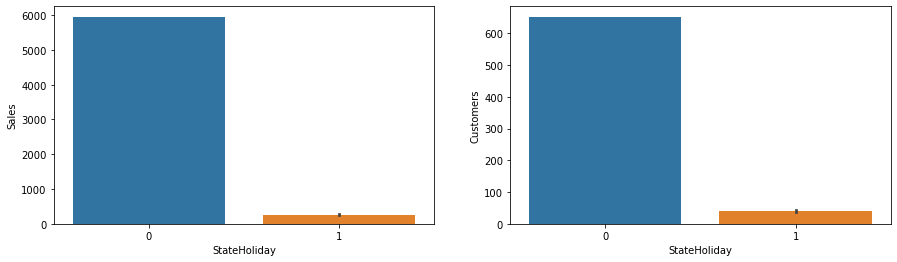

In [27]:
#State Holiday.
df_train["StateHoliday"] = df_train["StateHoliday"].map(
    {0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

sns.barplot(x='StateHoliday', y='Sales', data=df_train, ax=axis1)
sns.barplot(x='StateHoliday', y='Customers', data=df_train, ax=axis2)


<AxesSubplot:xlabel='SchoolHoliday', ylabel='Customers'>

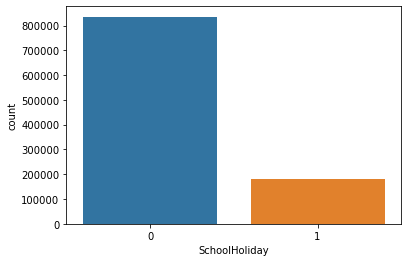

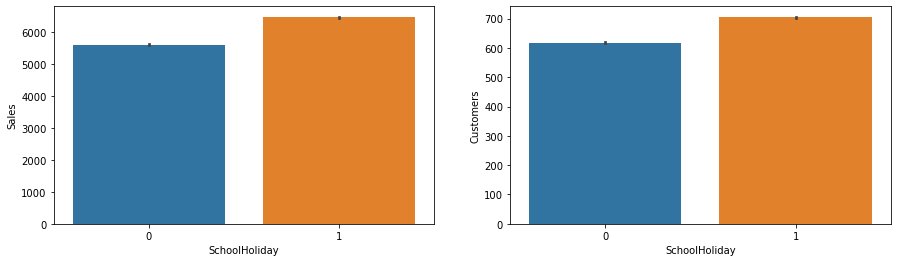

In [28]:
#School Holiday.
sns.countplot(x='SchoolHoliday', data=df_train)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

sns.barplot(x='SchoolHoliday', y='Sales', data=df_train, ax=axis1)
sns.barplot(x='SchoolHoliday', y='Customers', data=df_train, ax=axis2)


We can observe that most of the stores remain closed during State and School Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.

Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

In [29]:
#Joining store data and train data.
df_store = data_dictionary["store"]
df = pd.merge(df_train, df_store, how='left', on='Store')


### Store types

In [30]:
df.groupby('StoreType')['Sales'].describe()


,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


In [31]:
df.groupby('StoreType')['Customers', 'Sales'].sum()


<ipython-input-31-6b7ba7d0d2e6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('StoreType')['Customers', 'Sales'].sum()


,Customers,Sales
StoreType,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


Stores of type B has the highest average of Sales among others but, we have much less data for StoreType B.

But as we see further stores of type A has higher amount of total Customers and Sales. StoreType D goes on the second place in both Sales and Customers.

### Duration of promotion

In [32]:
df_store_1 = df.loc[df['Store']==1]
df_store_1.sort_values('Date', inplace=True)
df_store_1.head()

<ipython-input-32-eee62f560011>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_store_1.sort_values('Date', inplace=True)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1016095,1,2,2013-01-01,0,0,0,0,1,1,2013,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1014980,1,3,2013-01-02,5530,668,1,0,0,1,2013,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1013865,1,4,2013-01-03,4327,578,1,0,0,1,2013,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1012750,1,5,2013-01-04,4486,619,1,0,0,1,2013,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1011635,1,6,2013-01-05,4997,635,1,0,0,1,2013,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [34]:
df_store_2 = df.loc[df['Store'] == 2]

df_store_2.sort_values('Date', inplace=True)
df_store_2.head()


<ipython-input-34-3b0b212df1f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_store_2.sort_values('Date', inplace=True)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1016096,2,2,2013-01-01,0,0,0,0,1,1,2013,...,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1014981,2,3,2013-01-02,4422,650,1,0,0,1,2013,...,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1013866,2,4,2013-01-03,4159,555,1,0,0,1,2013,...,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1012751,2,5,2013-01-04,4484,574,1,0,0,1,2013,...,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1011636,2,6,2013-01-05,2342,324,1,0,0,0,2013,...,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


### Seasonalities with fourier transformation

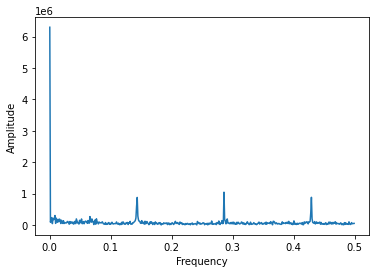

In [36]:
#Store Type 'A'.
df_store_11_sales = df.loc[df['Store'] == 11]['Sales']

Y = np.fft.fft(df_store_11_sales.values)
freq = np.fft.fftfreq(len(Y), 1)
n = len(freq)
plt.figure()
plt.plot(freq[:int(n/2)], np.abs(Y)[:int(n/2)])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()


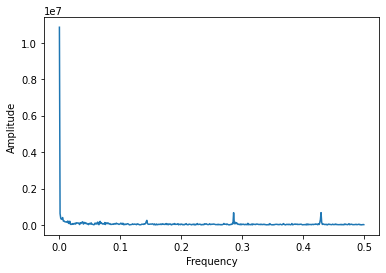

In [37]:
#Store Type 'B'.
df_store_259_sales = df.loc[df['Store']==259]['Sales']
Y = np.fft.fft(df_store_259_sales.values)
freq = np.fft.fftfreq(len(Y), 1)
n = len(freq)
plt.figure()
plt.plot( freq[:int(n/2)], np.abs(Y)[:int(n/2)] )
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

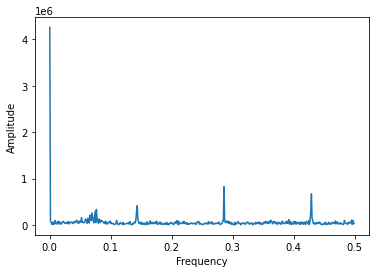

In [38]:
#Store Type 'C'.
df_store_21_sales = df.loc[df['Store']==21]['Sales']
Y    = np.fft.fft(df_store_21_sales.values)
freq = np.fft.fftfreq(len(Y), 1)
n = len(freq)
plt.figure()
plt.plot( freq[:int(n/2)], np.abs(Y)[:int(n/2)] )
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

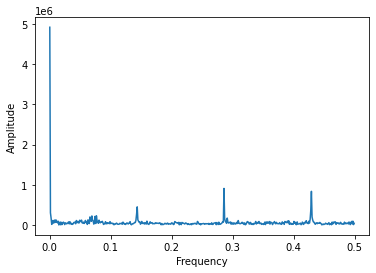

In [40]:
#Store Type 'D'.
df_store_1115_sales = df.loc[df['Store']==1115]['Sales']
Y = np.fft.fft(df_store_1115_sales.values)
freq = np.fft.fftfreq(len(Y), 1)
n = len(freq)
plt.figure()
plt.plot( freq[:int(n/2)], np.abs(Y)[:int(n/2)] )
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

In the above graphs we can see that there are some spikes at particular frequencies. This indicates that there is a seasonality component in the store sales data.

Thus we can use these Fourier features to indicate the seasonality in the data.

### Competition open since Year/Month

In [41]:
percent_year = 100 * \
    (len(df_store.loc[pd.isnull(
        df_store['CompetitionOpenSinceYear'])])) / len(df_store)
percent_month = 100 * \
    (len(df_store.loc[pd.isnull(
        df_store['CompetitionOpenSinceMonth'])])) / len(df_store)

print(
    f'The percent of missing values in Competition Open Since Year feature is {percent_year}.')
print(
    f'The percent of missing values in Competition Open Since Month feature is {percent_month}.')


The percent of missing values in Competition Open Since Year feature is 31.748878923766817.
The percent of missing values in Competition Open Since Month feature is 31.748878923766817.


In [43]:
df_store[df_store['CompetitionOpenSinceYear'].isna()]


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


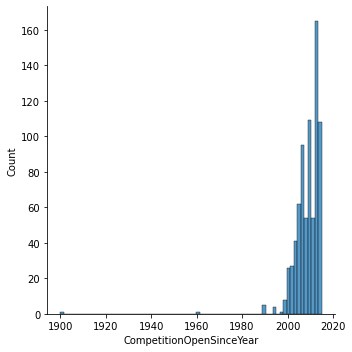

In [47]:
sns.displot(df_store['CompetitionOpenSinceYear'])

In [48]:
year_median = df_store['CompetitionOpenSinceYear'].median()
print(
    f'Most of stores have their competition opened in the year {year_median}.')


Most of stores have their competition opened in the year 2010.0.


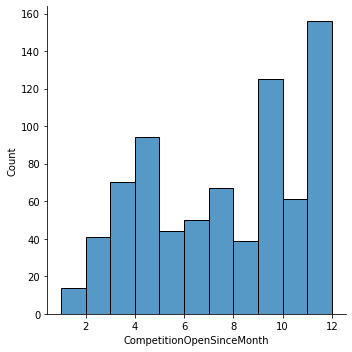

In [50]:
sns.displot(df_store['CompetitionOpenSinceMonth'])


In [51]:
month_median = df_store['CompetitionOpenSinceMonth'].median()
print(
    f'Most of stores have their competition opened in the month {month_median}.')


Most of stores have their competition opened in the month 8.0.
